In [2]:
import pandas as pd

In [3]:
# importing my csv file

df = pd.read_csv('TCSS.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-11-2013,35.000000,37.000000,32.099998,36.200001,33.839130,14667600
1,04-11-2013,36.799999,36.799999,34.689999,35.349998,33.044563,1586600
2,05-11-2013,35.110001,35.500000,34.820000,35.349998,33.044563,337700
3,06-11-2013,35.610001,36.490002,35.610001,35.900002,33.558697,549600
4,07-11-2013,36.799999,36.799999,34.119999,35.310001,33.007175,883700
...,...,...,...,...,...,...,...
2633,22-04-2024,0.900000,0.910000,0.860000,0.880000,0.880000,59300
2634,23-04-2024,0.880000,0.930000,0.880000,0.900000,0.900000,68500
2635,24-04-2024,0.880000,0.930000,0.880000,0.890000,0.890000,30000
2636,25-04-2024,0.880000,0.910000,0.870000,0.870000,0.870000,62400


In [5]:
df1 = df.copy()

In [6]:
# I only want two columns date and close for now so I am removing all other columns

df1 = df1[['Date','Close']]

In [7]:
# Here given date time is in object manner so I want to changeit into proper date time format
# so I am using datetime to convert that solumn into year month and day

import datetime

In [11]:
def str_to_datetime(s):
  split = s.split('-') # spliting value of column by '-'
  year,month,day = int(split[2]), int(split[1]), int(split[0])
  return datetime.datetime(year=year,month=month,day=day)



In [12]:
# now for testing one value
x = str_to_datetime('05-12-1935')
x

# here last two zeros for time but we dont need them so nothing to worry

datetime.datetime(1935, 12, 5, 0, 0)

In [13]:
# now we are going to apply this function on date column
# here I am going to use apply for function so I will not give any values in parameter

df1['Date'] = df['Date'].apply(str_to_datetime)

In [14]:
df1['Date']
# You can see nothing has changed but the data type is now datetime64

0      2013-11-01
1      2013-11-04
2      2013-11-05
3      2013-11-06
4      2013-11-07
          ...    
2633   2024-04-22
2634   2024-04-23
2635   2024-04-24
2636   2024-04-25
2637   2024-04-26
Name: Date, Length: 2638, dtype: datetime64[ns]

In [15]:
# Now we want to make date column as an index
df1.index = df1.pop('Date')
# this pop function will remove one solumn from our data set so it will remove index column and set date column as index

In [16]:
df1.head()

,Close
Date,
2013-11-01,36.200001
2013-11-04,35.349998
2013-11-05,35.349998
2013-11-06,35.900002
2013-11-07,35.310001


In [17]:
import matplotlib.pyplot as plt

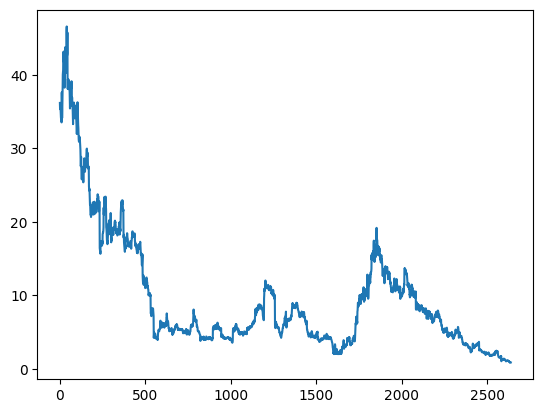

In [18]:
plt.plot(df.index,df['Close'])

In [21]:
def str_to_datetime(s):
  split = s.split('-') # spliting value of column by '-'
  year,month,day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year,month=month,day=day)


In [22]:
# here we are going to use LSTM model so we will have to convert this problem into supervised learning problem

import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df1,
                                '2013-11-06',
                                '2024-04-26',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2013-11-06,36.200001,35.349998,35.349998,35.900002
1,2013-11-07,35.349998,35.349998,35.900002,35.310001
2,2013-11-08,35.349998,35.900002,35.310001,34.950001
3,2013-11-11,35.900002,35.310001,34.950001,34.240002
4,2013-11-12,35.310001,34.950001,34.240002,33.990002
...,...,...,...,...,...
2630,2024-04-22,0.880000,0.920000,0.860000,0.880000
2631,2024-04-23,0.920000,0.860000,0.880000,0.900000
2632,2024-04-24,0.860000,0.880000,0.900000,0.890000
2633,2024-04-25,0.880000,0.900000,0.890000,0.870000


In [23]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:,0]

  middle_matrix = df_as_np[:,1:-1]

  X = middle_matrix.reshape((len(dates),middle_matrix.shape[1],1))

  Y = df_as_np[:,-1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

In [24]:
dates.shape,X.shape, y.shape

((2635,), (2635, 3, 1), (2635,))

In [25]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [27]:
model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
                    layers.Dense(32,activation='relu'),
                    layers.Dense(32,activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100)

Epoch 1/100
66/66 [==============================] - 4s 18ms/step - loss: 115.3041 - mean_absolute_error: 7.2217 - val_loss: 6.0853 - val_mean_absolute_error: 2.4263
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 8.8859 - mean_absolute_error: 1.2305 - val_loss: 0.0513 - val_mean_absolute_error: 0.1724
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 0.4585 - mean_absolute_error: 0.3805 - val_loss: 0.0552 - val_mean_absolute_error: 0.1763
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 0.3279 - mean_absolute_error: 0.3205 - val_loss: 0.0504 - val_mean_absolute_error: 0.1687
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 0.3285 - mean_absolute_error: 0.3352 - val_loss: 0.0464 - val_mean_absolute_error: 0.1646
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.3286 - mean_absolute_error: 0.3299 - val_loss: 0.1102 - val_mean_absolute_error: 0.2640
Epoch 7/100
66/66 [

66/66 [==============================] - 1s 4ms/step


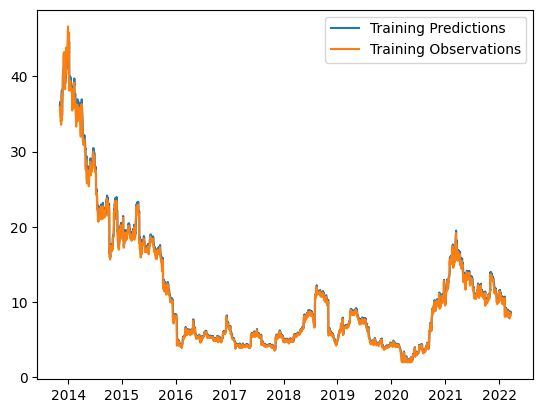

In [28]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

9/9 [==============================] - 0s 8ms/step


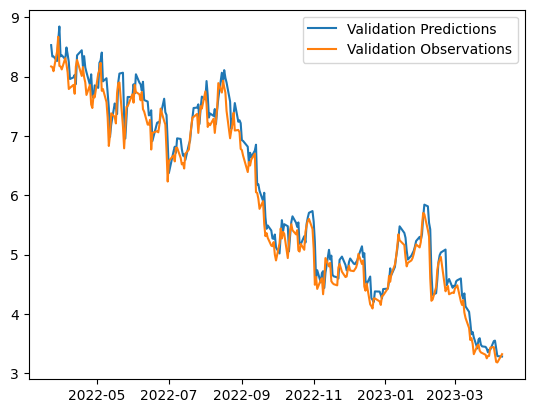

In [29]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

9/9 [==============================] - 0s 2ms/step


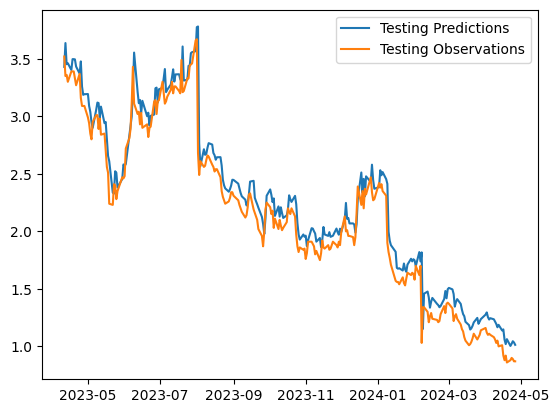

In [30]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

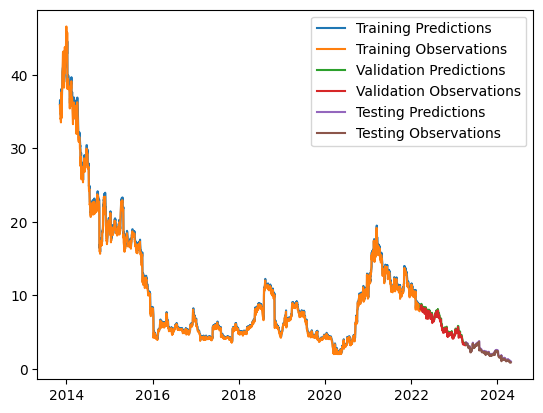

In [31]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [57]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 20ms/step


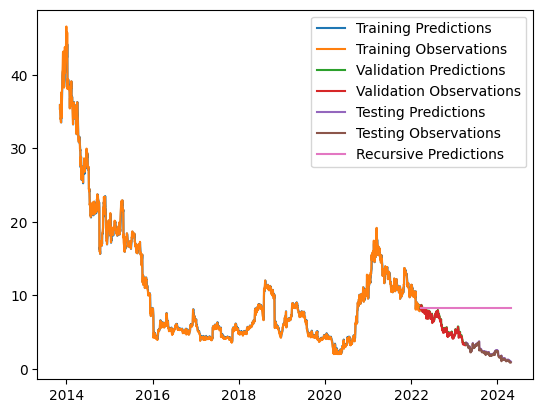

In [58]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20065 (78.38 KB)
Trainable params: 20065 (78.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.save('.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
